# **Fundamentos de ETL (Extract, Transform, Load) com Python**

ETL vêm de Extract, Transform and Load (extrair, transformar e carregar). Ferramentas de mineração, carregamentos entre outros.
Usaremos Pandas e a Framework Luigi criando um  dashboard para visualizar.


## Introdução ao ETL
Precisamos combinar dados de diferentes fontes em uma dashboard.


### Extrair
Importar dados de diversos tipos e formatos

### Transformação
Colunas, Linhas
Tipo de dados
Mesclar, Acrescentar
Listas, Tabelas

### Load
Para o modelo de dados.


### Vantagens:
Qualidade dos dados
Funcionalidade de execução
Padronização de informação


## Pandas
Pandas permite Excel e dados de tabela SQL; Além de Matrizes e outras estruturas não rotuladas.

### Serie:
- Uma Serie é uma matriz unidimensional que contém uma sequencia de valores que tem indexação.

### DataFrame
- Estrutura tabular, semelhante a planilhas de excel, as linhas e colunas apresentam rótulos.


## MatplotLib
Para facilitar a visualização.

In [22]:
#pip install pandas
#pip install matplotlib
import pandas as pd
import matplotlib as plt

In [3]:
spotifyData = pd.read_csv('./Dados/spotify-data.csv')

In [7]:
spotifyData.head(3)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0


In [8]:
spotifyData.any()

id                  True
name                True
artists             True
duration_ms         True
release_date        True
year                True
acousticness        True
danceability        True
energy              True
instrumentalness    True
liveness            True
loudness            True
speechiness         True
tempo               True
valence             True
mode                True
key                 True
popularity          True
explicit            True
dtype: bool

In [9]:
spotifyData.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit'],
      dtype='object')

In [10]:
spotifyData.isnull().sum()

id                  0
name                0
artists             0
duration_ms         0
release_date        0
year                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
mode                0
key                 0
popularity          0
explicit            0
dtype: int64

In [19]:
spotifyData['year'].nunique()
#spotifyData['artists'].unique()

100

<AxesSubplot:title={'center':'Contagem por mod'}>

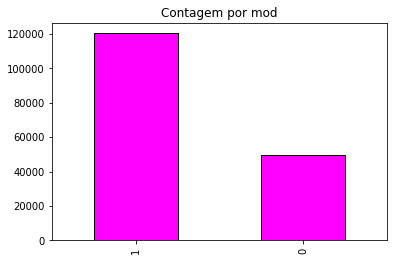

In [73]:
spotifyData['mode'].unique()
spotifyData['mode'].value_counts().plot(kind='bar', title= 'Contagem por mode',edgecolor='black', color=(1.0, 0.0, 1.0, 1)) 
#Color segue o RGBA

<AxesSubplot:title={'center':'Contagem por mod'}>

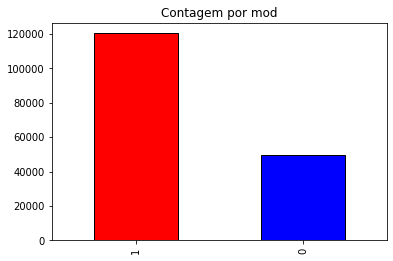

In [77]:
spotifyData['mode'].unique()
spotifyData['mode'].value_counts().plot(kind='bar', title= 'Contagem por mode',edgecolor='black', color=['red','blue']) 
#Color segue o RGBA

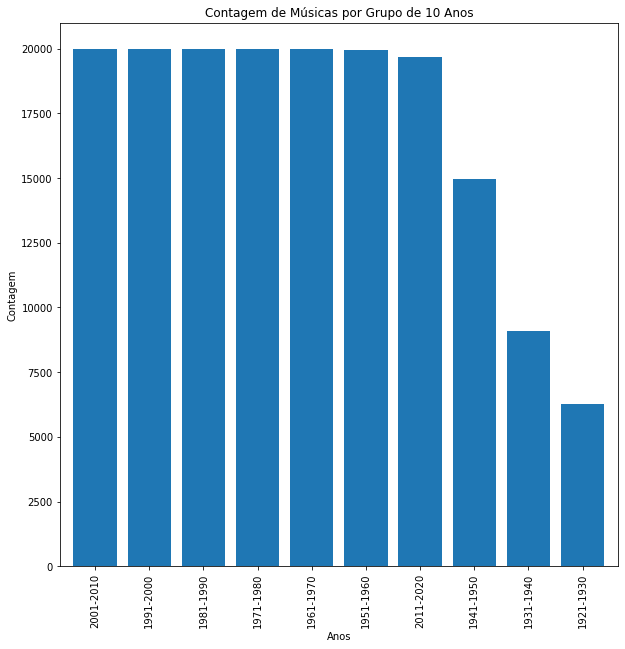

In [46]:
bins = range(min(spotifyData['year']), max(spotifyData['year']) + 11, 10)
labels = [f"{bin}-{bin+9}" for bin in bins[:-1]]

# Adicionando uma nova coluna para representar os grupos de 10 anos
spotifyData['year_group'] = pd.cut(spotifyData['year'], bins=bins, labels=labels, right=False)

# Contando os valores em cada grupo
year_group_counts = spotifyData['year_group'].value_counts()

# Criando o gráfico de barras
plot = year_group_counts.plot(kind='bar', xlabel='Anos', ylabel = 'Contagem', title= 'Contagem de Músicas por Grupo de 10 Anos',
                              width=0.8, figsize=[10,10])




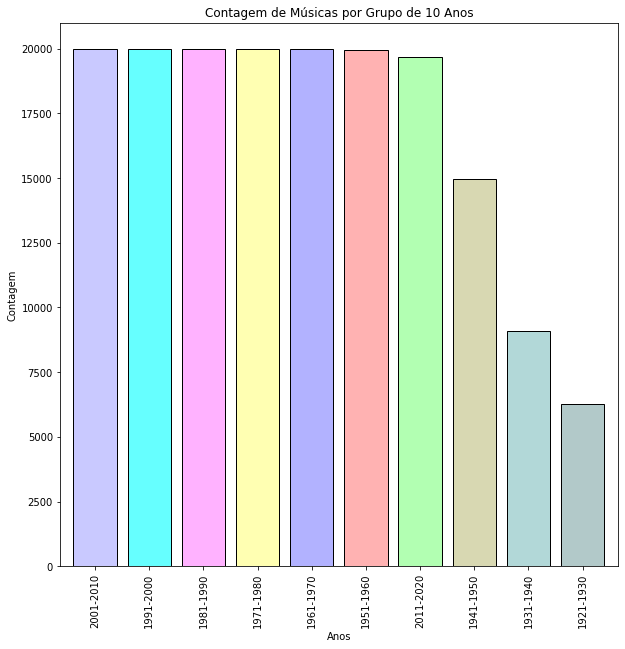

In [84]:
bins = range(min(spotifyData['year']), max(spotifyData['year']) + 11, 10)
labels = [f"{bin}-{bin+9}" for bin in bins[:-1]]

# Adicionando uma nova coluna para representar os grupos de 10 anos
spotifyData['year_group'] = pd.cut(spotifyData['year'], bins=bins, labels=labels, right=False)

# Contando os valores em cada grupo
year_group_counts = spotifyData['year_group'].value_counts()

# Criando o gráfico de barras
plot = year_group_counts.plot(kind='bar', xlabel='Anos', ylabel = 'Contagem', title= 'Contagem de Músicas por Grupo de 10 Anos',
                              width=0.8, figsize=[10,10], color=[(0.3, 0.3, 1.0, 0.3),(0.0, 1.0, 1.0, 0.6),(1.0, 0.0, 1.0, 0.3),
                                                                 (1.0, 1.0, 0.0, 0.3),(0.0, 0.0, 1.0, 0.3),(1.0, 0.0, 0.0, 0.3),
                                                                 (0.0, 1.0, 0.0, 0.3),(0.5, 0.5, 0.0, 0.3),(0.0, 0.5, 0.5, 0.3),
                                                                 (0.0, 0.3, 0.3, 0.3)],
                                                                 edgecolor='black')


